In [1]:
#Step1: Data Set Overview and preprocessing
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data set 
df = pd.read_csv('drug200.csv')

# Display basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [4]:
# Summary statistics
print(df.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [5]:
# Check for missing values
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


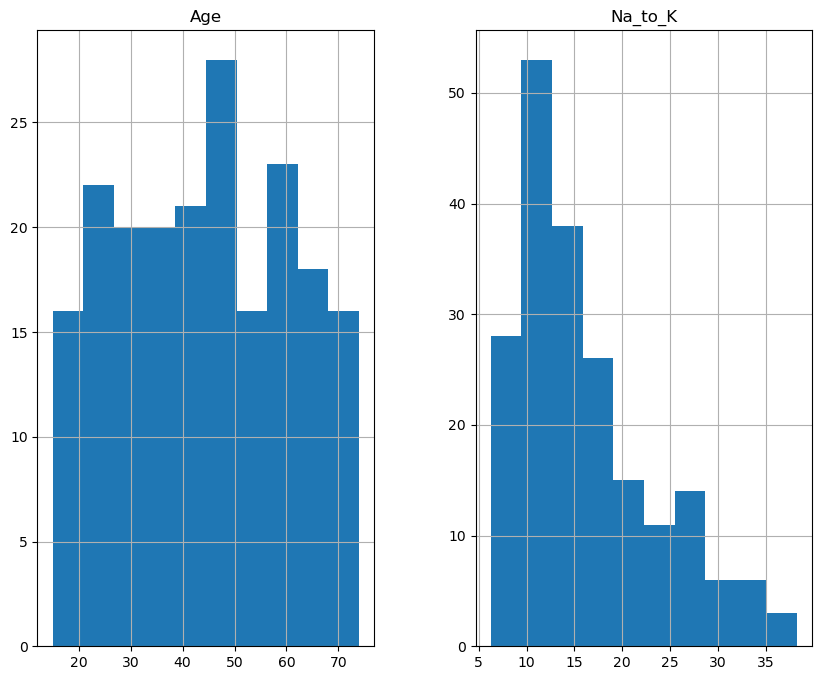

In [6]:
# Visualize distributions of numerical features
df.hist(figsize=(10,8))
plt.show()

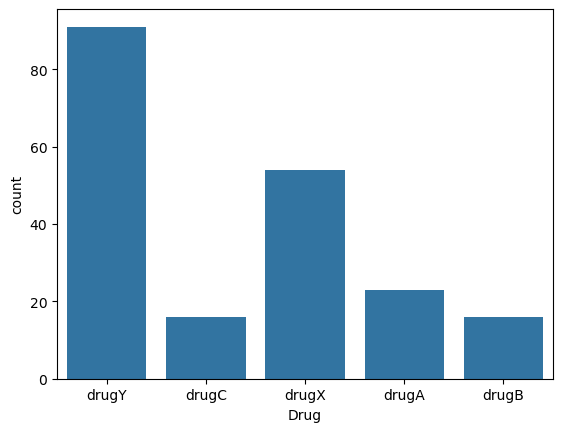

In [7]:
# Visualize counts of target classes
sns.countplot(x='Drug', data=df)
plt.show()

In [16]:
# Encode categorical features: Sex, BP, Cholesterol
categorical_cols = ['Sex', 'BP', 'Cholesterol']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY


In [ ]:
#Step 2: Decision Tree Model Building
from sklearn.tree import DecisionTreeClassifier

# Define features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Accuracy: 1.0000


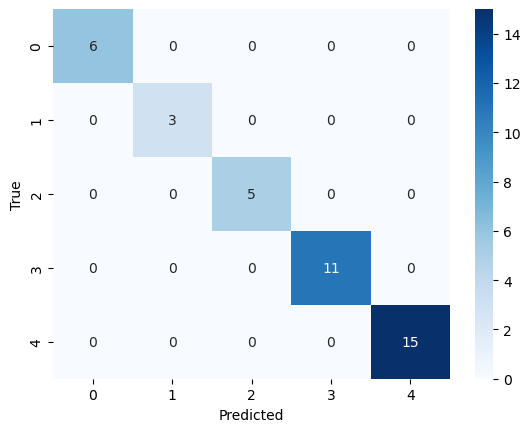

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [18]:
#Step 3: Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Predict on test data
y_pred = clf.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred))


In [ ]:
# Step 4: Prediction on New Data
# Example new patient data (Age, Sex, BP, Cholesterol, Na_to_K ratio)
new_patient = [[50, 1, 3, 2, 15.0]]  # Sex encoded similarly (0/1)

# Predict drug
predicted_drug = clf.predict(new_patient)
print(f"Predicted Drug: {predicted_drug[0]}")


Predicted Drug: drugY


c:\Users\Ganesh\anaconda3\envs\my_lab\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


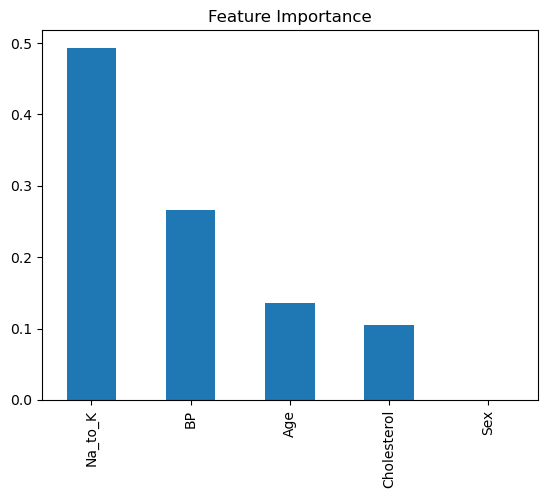

In [20]:
#Step 5: Feature Importance
# Extract and plot feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


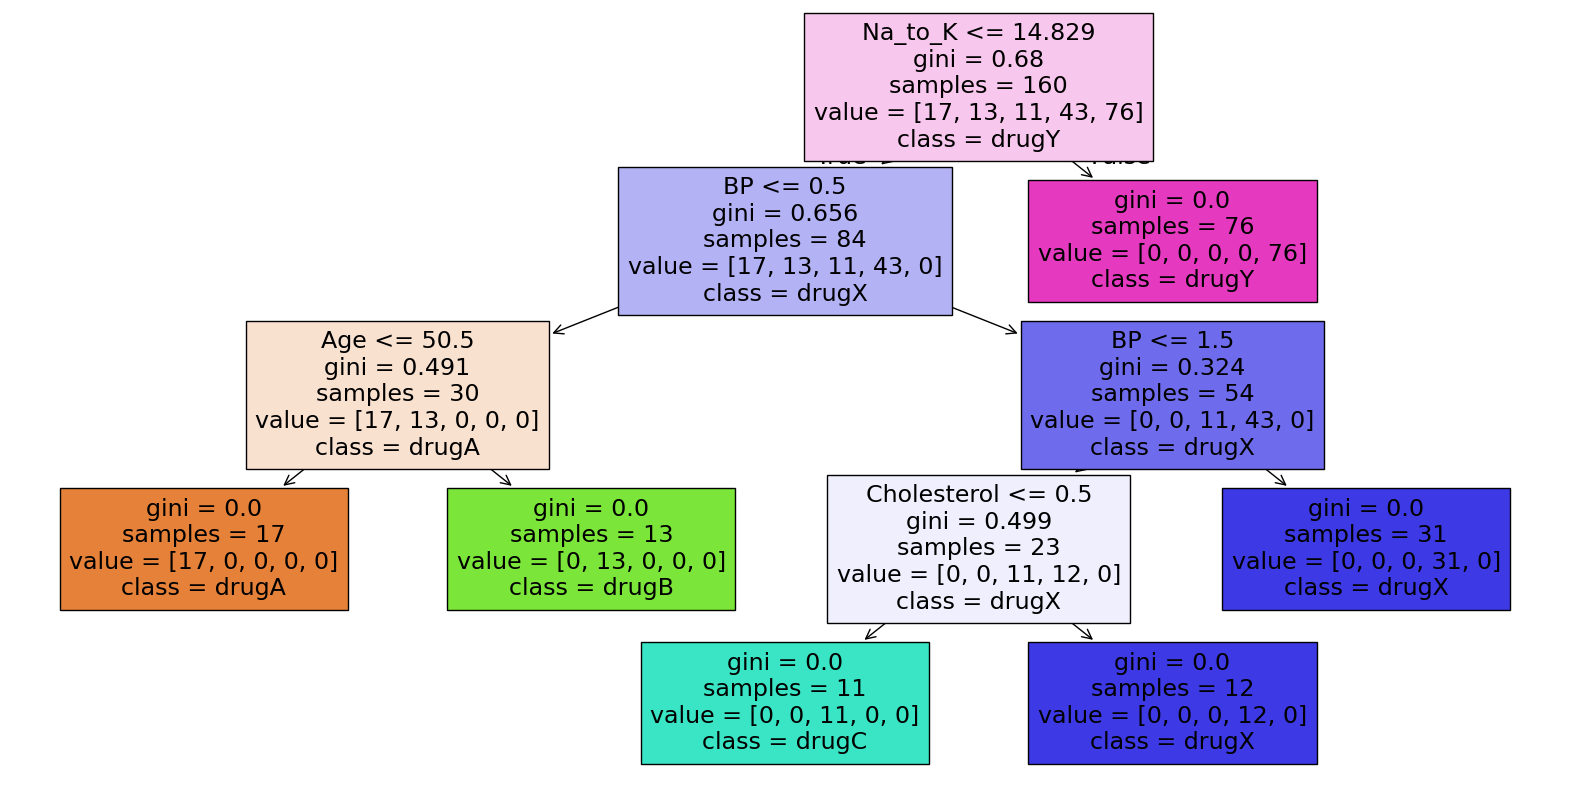

In [ ]:
# Step 6: Advanced - Pruning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Pruning by limiting max_depth (already set to 4), can experiment by changing max_depth

# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()